In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import networkx.readwrite.gml as nrg
import warnings
warnings.filterwarnings('ignore')
import random
import sys

In [2]:
def updategraph(G,cnode,centdis):
    
    # select shortest path from centroid to each node
    
    for v in G.nodes():   #-------------------cluster id set------------------
        for i in range(C):
            if G.node[v]['Cdis'] > nx.dijkstra_path_length(G,v,cent[i]): 
                G.node[v]['clid']=i
                G.node[v]['Cdis']=nx.dijkstra_path_length(G,v,cent[i])
        cnode[G.node[v]['clid']].append(v)

    for i in range(C):
        print cnode[i]
    pcent=cent[:]
    print pcent      #-----------save center node-----------------------

    #update centroids 
    for i in range(C):
        for v in G.nodes():
            if G.node[pcent[i]]['clid'] == G.node[v]['clid']:
                for j in range(len(cnode[i])):
                    #if cnode[i][j] != pcent[i]:
                    G.node[v]['Sdis']+=alpha*nx.dijkstra_path_length(G,v,cnode[i][j])
                
                for j in range(C):
                    #if j != G.node[v]['clid']:
                        G.node[v]['Sdis']+=(1-alpha)*nx.dijkstra_path_length(G,v,pcent[j])

                if G.node[v]['Sdis'] < centdis[i]:
                    centdis[i]=G.node[v]['Sdis']
                    cent[i]=v
    for i in G.nodes():
        if cent.count(i) > 0:
            print i,G.node[i]['clid'],G.node[i]['Sdis']
    return cnode
                    #print "id:",i,"node",v,G.node[v]['Sdis']

In [3]:
def maxcsdist(G,cent):
    csdl=[-1 for i in range(C)] # Csdl is an array of maximum distance nodes to each controller C
    for i in range(C):
        for v in G.nodes():
            for j in range(len(cnode[i])):
                if csdl[i] < nx.dijkstra_path_length(G,cent[i],cnode[i][j]):
                    csdl[i]=nx.dijkstra_path_length(G,cent[i],cnode[i][j])
                    c1 = i
                    distNode = v
    
    print "Max Node distances for each controller:",dict(zip(cent, csdl))    
    print "Maximum Controller/Node distance is:",max(csdl),",from:",cent[i],"to:",v
    return max(csdl)    

In [4]:
def maxccdist(G,cent):
    ccdist=-1
    for i in range(C):
        for j in range(i+1,C):
            if ccdist < nx.dijkstra_path_length(G,cent[i],cent[j]):
                ccdist=nx.dijkstra_path_length(G,cent[i],cent[j])
                c1 = i
                c2 = j
    print "Maximum Controller/Controller distance is: ",ccdist,", from:",cent[c1],"to:",cent[c2]
    return ccdist

In [5]:
G=nrg.read_gml("graphdata/OS3E.gml")
C=2
cent=[]
centdis=[]
preCent=[0 for i in range(C)]
nochange=False

alpha=1


In [6]:
try:
    to_del = [n for n in G if G.node[n]['Internal'] == 0]
    g.remove_nodes_from(to_del)
except:
    print("Erro ao remover nós internos. Pode ser que não existam")

Erro ao remover nós internos. Pode ser que não existam


In [7]:
for i in G.nodes:
    print i
    G.node[str(i)]['center']=False
    G.node[str(i)]['clid']=-1
    G.node[str(i)]['Sdis']=0
    G.node[str(i)]['Cdis']=100

Baton_Rouge
Los_Angeles
Jackson
Chicago
Philadelphia
Denver
Dallas
Louisville
Vancouver
New_York
Indianapolis
Pittsburgh
El_Paso
Nashville
Albuquerque
Ashburn
Kansas_City
Atlanta
Memphis
Jacksonville
Miami
Missoula
Tucson
Raleigh
Sunnyvale
Buffalo
Salt_Lake_City
Houston
Boston
Washington
Minneapolis
Cleveland
Portland
Seattle


In [8]:
#if==0:
# Haversine formula example in Python
# Author: Wayne Dyck

import math

def harvesine(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # radius of Earth in Kmeters, for meters use 6371000

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

## inicializa latência
# Para isso a distância em km é calculada e usamos ela para a fórmula de latência

for i in G.edges:
    orig,dest = i
    dist = harvesine([G.node[orig]['Latitude'],G.node[orig]['Longitude']],[G.node[dest]['Latitude'],G.node[dest]['Longitude']])
    latency = (dist/(2*10^8))
    G.edges[i]['weight'] = math.floor(latency)
    
#exemplo
G.edges['Baton_Rouge', u'Houston']

{u'LinkLabel': u'Red Link', 'weight': 14.0}

In [9]:
for i in range(C): #---------------------initialize centers
    centdis.append(sys.maxint)   #----------initialize center distance
cent=random.sample(G.nodes(),C)

In [10]:
s#DEBUG - botanto centros na mão para evitar aleatoriedade 
cent = [u'Ashburn',
 u'Chicago',
 u'Albuquerque',
 u'Sunnyvale',
 u'Houston',
 u'Los_Angeles']

NameError: name 's' is not defined

In [11]:
for i in range(C):
    print cent[i],

Washington Memphis


In [12]:
while nochange is False:
    cnode=[[] for i in range(C)]
    cnode = updategraph(G,cnode,centdis)

    h=0
    for i in range(C):  #---------center
        centdis[i]=sys.maxint #------------- initialize center distance
        if preCent[i]==cent[i]:
            h+=1

    print "center:",cent
    print "Precent:",preCent
    for i in range(C): #----------new center
        preCent[i]=cent[i]

    if h==C:
        nochange=True

    for i in G.nodes():
        G.node[i]['Sdis']=0      #--------initialize distance sum
        G.node[i]['Cdis']=100    #---------initialize distance from each node to center

print "end"

[u'Chicago', u'Philadelphia', u'Denver', u'New_York', u'Pittsburgh', u'Ashburn', u'Kansas_City', u'Raleigh', u'Buffalo', u'Boston', u'Washington', u'Minneapolis', u'Cleveland']
[u'Baton_Rouge', u'Los_Angeles', u'Jackson', u'Dallas', u'Louisville', u'Vancouver', u'Indianapolis', u'El_Paso', u'Nashville', u'Albuquerque', u'Atlanta', u'Memphis', u'Jacksonville', u'Miami', u'Missoula', u'Tucson', u'Sunnyvale', u'Salt_Lake_City', u'Houston', u'Portland', u'Seattle']
[u'Washington', u'Memphis']
Pittsburgh 0 322.0
Houston 1 1328.0
center: [u'Pittsburgh', u'Houston']
Precent: [0, 0]
[u'Chicago', u'Philadelphia', u'Louisville', u'New_York', u'Indianapolis', u'Pittsburgh', u'Ashburn', u'Atlanta', u'Raleigh', u'Buffalo', u'Boston', u'Washington', u'Minneapolis', u'Cleveland']
[u'Baton_Rouge', u'Los_Angeles', u'Jackson', u'Denver', u'Dallas', u'Vancouver', u'El_Paso', u'Nashville', u'Albuquerque', u'Kansas_City', u'Memphis', u'Jacksonville', u'Miami', u'Missoula', u'Tucson', u'Sunnyvale', u'Salt_L

In [13]:
colors=["r","g","b","c","m","y"]
maxCS=maxcsdist(G,cent)
maxCC=maxccdist(G,cent)


Max Node distances for each controller: {u'El_Paso': 115.0, u'Washington': 67.0}
Maximum Controller/Node distance is: 115.0 ,from: El_Paso to: Seattle
Maximum Controller/Controller distance is:  120.0 , from: Washington to: El_Paso


In [14]:
## maximum distance from controller to node inside it's subnetwork
maxCS

115.0

In [15]:
## maximum distance from controller to controller
maxCC

120.0

In [16]:
lat=nx.get_node_attributes(G,'Latitude')
lng=nx.get_node_attributes(G,'Longitude')

# merging dicts for each key
from collections import defaultdict
pos = defaultdict(list)

for d in (lng, lat): # you can list as many input dicts as you want here
    for key, value in d.items():
        pos[key].append(value)

In [17]:
for u,v in G.edges():
    print G[u][v]

{u'LinkLabel': u'Red Link', 'weight': 14.0}
{u'LinkLabel': u'Blue Link', 'weight': 32.0}
{u'LinkLabel': u'Red Link', 'weight': 33.0}
{u'LinkLabel': u'Red Link', 'weight': 25.0}
{u'LinkLabel': u'Cyan Link', 'weight': 17.0}
{u'LinkLabel': u'Red Link', 'weight': 20.0}
{u'LinkLabel': u'Red Link', 'weight': 11.0}
{u'LinkLabel': u'Red Link', 'weight': 9.0}
{u'LinkLabel': u'Red Link', 'weight': 20.0}
{u'LinkLabel': u'Red Link', 'weight': 23.0}
{u'LinkLabel': u'Red Link', 'weight': 17.0}
{u'LinkLabel': u'Red Link', 'weight': 4.0}
{u'LinkLabel': u'Red Link', 'weight': 7.0}
{u'LinkLabel': u'Red Link', 'weight': 21.0}
{u'LinkLabel': u'Red Link', 'weight': 19.0}
{u'LinkLabel': u'Blue Link', 'weight': 32.0}
{u'LinkLabel': u'Red Link', 'weight': 12.0}
{u'LinkLabel': u'Red Link', 'weight': 26.0}
{u'LinkLabel': u'Red Link', 'weight': 6.0}
{u'LinkLabel': u'Green Link', 'weight': 8.0}
{u'LinkLabel': u'Red Link', 'weight': 6.0}
{u'LinkLabel': u'Red Link', 'weight': 10.0}
{u'LinkLabel': u'Red Link', 'weig

In [18]:
edge_labels = dict([((u,v,), d['weight']) for u,v,d in G.edges(data=True)])

In [19]:
edge_labels

{(u'Ashburn', u'Washington'): 1.0,
 (u'Atlanta', u'Jacksonville'): 16.0,
 (u'Atlanta', u'Raleigh'): 20.0,
 (u'Baton_Rouge', u'Houston'): 14.0,
 (u'Baton_Rouge', u'Jacksonville'): 32.0,
 (u'Buffalo', u'Boston'): 22.0,
 (u'Buffalo', u'Cleveland'): 9.0,
 (u'Chicago', u'Cleveland'): 17.0,
 (u'Chicago', u'Indianapolis'): 9.0,
 (u'Chicago', u'Kansas_City'): 23.0,
 (u'Chicago', u'Minneapolis'): 20.0,
 (u'Dallas', u'Houston'): 12.0,
 (u'Dallas', u'Kansas_City'): 26.0,
 (u'Denver', u'Albuquerque'): 19.0,
 (u'Denver', u'Kansas_City'): 32.0,
 (u'Denver', u'Salt_Lake_City'): 21.0,
 (u'El_Paso', u'Albuquerque'): 13.0,
 (u'El_Paso', u'Houston'): 38.0,
 (u'El_Paso', u'Tucson'): 15.0,
 (u'Jackson', u'Houston'): 20.0,
 (u'Jackson', u'Memphis'): 11.0,
 (u'Jacksonville', u'Miami'): 18.0,
 (u'Los_Angeles', u'Salt_Lake_City'): 33.0,
 (u'Los_Angeles', u'Sunnyvale'): 17.0,
 (u'Los_Angeles', u'Tucson'): 25.0,
 (u'Louisville', u'Indianapolis'): 6.0,
 (u'Louisville', u'Nashville'): 8.0,
 (u'Missoula', u'Minneap

In [20]:
# offset on the y axis of the nodes position
y_off = 0.5  
x_off = 1 
pos_higher = {}

for k, v in pos.items():
    pos_higher[k] = (v[0]+x_off, v[1]+y_off)

[u'Chicago', u'Philadelphia', u'Louisville', u'New_York', u'Indianapolis', u'Pittsburgh', u'Nashville', u'Ashburn', u'Kansas_City', u'Atlanta', u'Memphis', u'Jacksonville', u'Miami', u'Raleigh', u'Buffalo', u'Boston', u'Washington', u'Minneapolis', u'Cleveland']
[u'Baton_Rouge', u'Los_Angeles', u'Jackson', u'Denver', u'Dallas', u'Vancouver', u'El_Paso', u'Albuquerque', u'Missoula', u'Tucson', u'Sunnyvale', u'Salt_Lake_City', u'Houston', u'Portland', u'Seattle']
controller node: [u'Washington', u'El_Paso']
maxCS distance: 115.0
maxCC distance: 120.0
objective function: 115.0


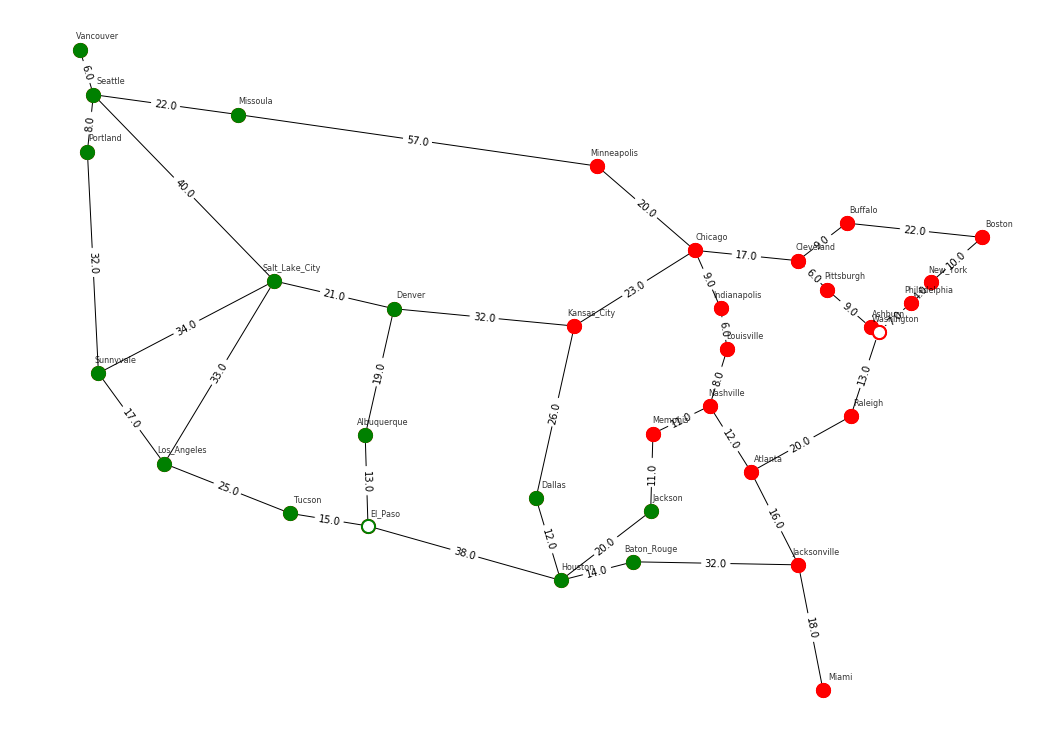

In [21]:
plt.figure(3,figsize=(14,10)) 
nx.draw(G,pos,node_size=200,with_labels=False)
nx.draw_networkx_labels(G, pos_higher,font_size=8,alpha=0.8)


for i in range(C):
    nx.draw_networkx_nodes(G,pos,cnode[i],node_size=200,node_color=colors[i])
    print cnode[i]
    
nx.draw_networkx_nodes(G,pos,cent,node_size=100,node_color='white',alpha=1)

nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)


print "controller node:",cent
print "maxCS distance:", maxCS
print "maxCC distance:", maxCC
print "objective function:", alpha*maxCS+(1-alpha)*maxCC
plt.show()